In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import control.matlab as ml
from math import pi
import warnings
warnings.filterwarnings('ignore')

# Transferencia



$$ H(s) = \dfrac{1, 356.10^7 . s^2}{s^4 + s^3 . 5207 + s^2 . 1,389 . 10^8 + s . 3,264 . 10^{11} + 3,928 . 10^{15}} $$

## 1)
Para hallar el tipo de filtro veo los valores de H en o y en el infinito

$$ H(0) = 0 $$ 
$$ H(\infty) = 0 $$

Por lo que el filtro es uno de tipo **pasabanda**

In [2]:
coef = [1, 5207, 1.389 * 10 **8, 3.264*10**11, 3.928 *10**15]

def X(s):
    return s**4 + s ** 3 * 5207 + s**2 * 1.389 * 10**8 + s*3.264 *10**11 + 3.928*10**15

def Y(s):
    return 1.356 * 10**7 * s**2

def H(s):
    return Y(s)/X(s)

In [3]:
poles = np.roots(coef)

In [4]:
p1 = np.poly1d([1, -1 * poles[0]])
p2 = np.poly1d([1, -1 * poles[1]])

In [5]:
p3 = np.poly1d([1, -1 * poles[2]])
p4 = np.poly1d([1, -1 * poles[3]])

In [6]:
P1 = p1 * p2
P1

poly1d([1.00000000e+00+0.j, 3.02992020e+03+0.j, 8.73192882e+07+0.j])

In [7]:
P2 = p3 * p4
P2

poly1d([1.00000000e+00+0.j, 2.17707980e+03+0.j, 4.49843337e+07+0.j])

In [8]:
w02 = P1[0] ** 0.5
w01 = P2[0] ** 0.5

In [9]:
w01, w02

((6707.036133042631+0j), (9344.479024826402+0j))

In [10]:
wm = (w01 + w02)/2

In [11]:
# Q1 = w01 / P1[1]
# Q2 = w02 / P2[1]

Q1 = wm / P1[1]
Q2 = wm / P2[1]

In [12]:
Q1, Q2

((2.6488346405721637+0j), (3.686478360592502+0j))

## 2)

In [13]:
# s = sp.symbols('s')
# F = 1.356 * 10**7 * s /(s**4 + s ** 3 * 5207 + s**2 * 1.389 * 10**8 + s*3.264 *10**11 + 3.928*10**15)

In [14]:
# t = sp.symbols('t')
# sp.inverse_laplace_transform(F, s, t)

In [15]:
from scipy import signal
num = [1.356 * 10**7, 0]
den = [1, 5207, 1.389 * 10**8, 3.264 *10**11, 3.928*10**15]
h_esc = signal.TransferFunction(num, den)

Respuesta al escalon ideal

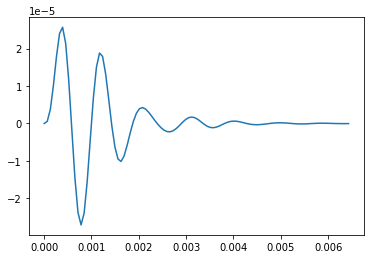

In [16]:
t,y = signal.step2(h_esc)

plt.plot(t, y)

Respuesta al impulso ideal

In [17]:
num = [1.356 * 10**7, 0, 0]
den = [1, 5207, 1.389 * 10**8, 3.264 *10**11, 3.928*10**15]
h_imp = signal.TransferFunction(num, den)

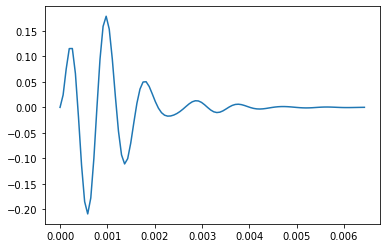

In [18]:
t,y = signal.step2(h_imp)

plt.plot(t, y)

In [19]:
H = h_imp

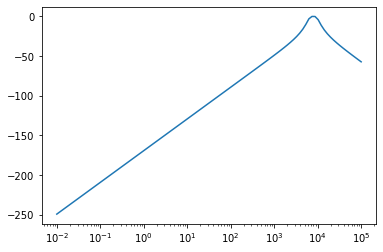

<Figure size 432x288 with 0 Axes>

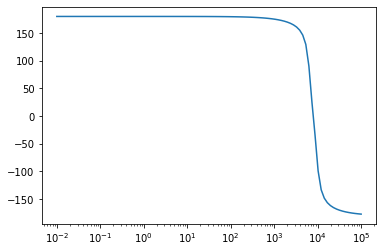

<Figure size 432x288 with 0 Axes>

In [20]:
w, mag, phase = signal.bode(H)
plt.figure()
plt.semilogx(w, mag)    # Bode magnitude plot
plt.figure()
plt.show()
plt.semilogx(w, phase)    # Bode phase plot
plt.figure()
plt.show()

In [21]:
print(P1)

   2
1 x + 3030 x + 8.732e+07


In [22]:
print(P2)

   2
1 x + 2177 x + 4.498e+07


In [23]:
A = -0.3286794954
B = -578.208559
C = 0.3286794954
D = 297.8449494

s = sp.symbols('s')

frac_1 = (A * s + B) / (s**2 + 3030 * s + 8.732 * 10 **7)
frac_2 = (C * s + D) / (s**2 + 2177 * s + 4.498 * 10 **7)

In [24]:
frac_2

(0.3286794954*s + 297.8449494)/(s**2 + 2177*s + 44980000.0)

In [25]:
# t = symbols('t', positive=True)
# s, t = sp.symbols('s, t')
# stepResponse1 = sp.inverse_laplace_transform(frac_1, s, t)
#stepResponse2 = sp.inverse_laplace_transform(frac2, s, t)

In [26]:
#Generar transferencia
numerador = [1.356 * 10**7, 0, 0]
denominador = [1, 5207, 1.389 * 10 **8, 3.264*10**11, 3.928 *10**15]

H = ml.tf(numerador, denominador)

H

TransferFunction(array([13560000.,        0.,        0.]), array([1.000e+00, 5.207e+03, 1.389e+08, 3.264e+11, 3.928e+15]))

## Diagrama de Bode

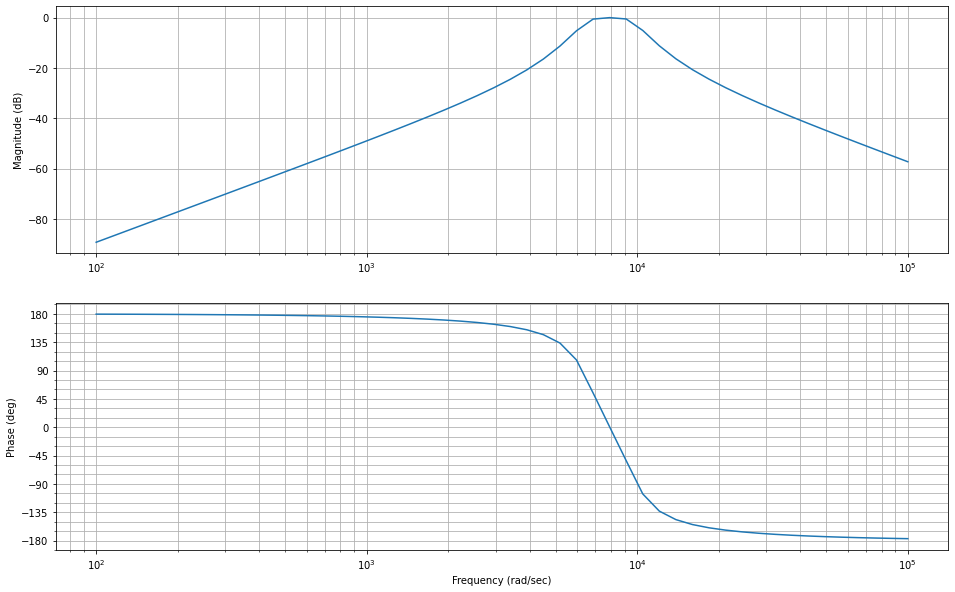

In [27]:
plt.figure(figsize=(16,10))
mod, fase, w = ml.bode(H);
plt.show();

In [28]:
print('Ceros: ', *map(lambda c: f's = {c}, w = {abs(c)}, f = {abs(c) / (2*pi)}', ml.zero(H)), sep='\n')
print()
print('Polos: ', *map(lambda c: f's = {c}, w = {abs(c)}, f = {abs(c) / (2*pi)}', ml.pole(H)), sep='\n')

Ceros: 
s = 0.0, w = 0.0, f = 0.0
s = 0.0, w = 0.0, f = 0.0

Polos: 
s = (-1514.9600990571644+9220.855933354847j), w = 9344.479024826402, f = 1487.2200274196557
s = (-1514.9600990571644-9220.855933354847j), w = 9344.479024826402, f = 1487.2200274196557
s = (-1088.5399009428356+6618.1126141820005j), w = 6707.0361330426385, f = 1067.4579540696868
s = (-1088.5399009428356-6618.1126141820005j), w = 6707.0361330426385, f = 1067.4579540696868


In [29]:
ml.zero(H), ml.pole(H)

(array([0., 0.]),
 array([-1514.96009906+9220.85593335j, -1514.96009906-9220.85593335j,
        -1088.53990094+6618.11261418j, -1088.53990094-6618.11261418j]))

## Respuesta al escalon

<Figure size 864x360 with 0 Axes>

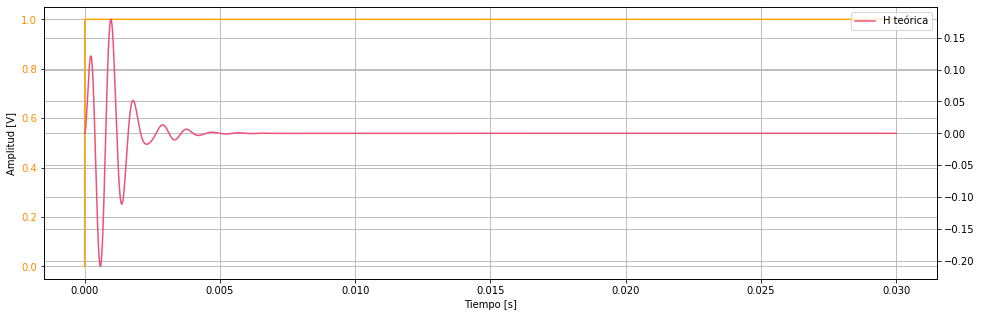

In [30]:
plt.figure(figsize=(12,5))
t = np.linspace(0, 0.03, 1000000, endpoint=False)
yout, T = ml.step(H, T=t)
fig, ax1 = plt.subplots(figsize=(16,5))
ax1.set_ylabel('Amplitud [V]')
ax1.set_xlabel('Tiempo [s]')
ax1.plot(T, [0] + [1 for _ in range(len(T)-1)], color='orange')
ax1.set_ylabel('Amplitud [V]')
ax1.tick_params(axis='y', labelcolor='darkorange')
ax2 = ax1.twinx()
ax2.plot(T, yout, color='#ed5178')
ax2.tick_params(axis='y', labelcolor='black')
ax2.legend(['H teórica'])
ax1.grid(axis='both')
ax2.grid(axis='y')
plt.show();

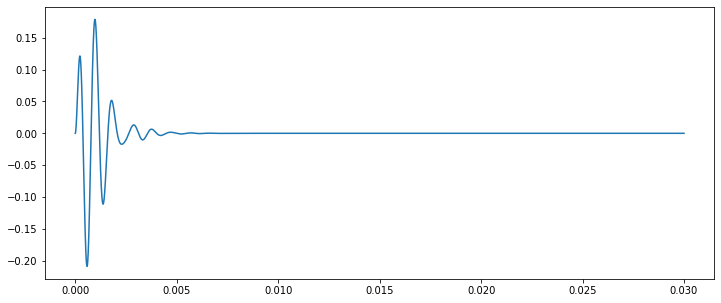

In [31]:
plt.figure(figsize=(12,5))
t = np.linspace(0, 0.03, 1000000, endpoint=False)
yout, T = ml.step(H, T=t)
plt.plot(T, yout)
plt.show();

## Respuesta al impulso

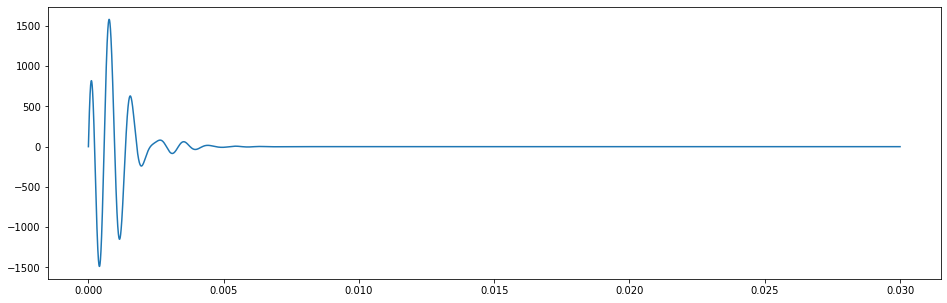

In [32]:
plt.figure(figsize=(16,5))
t = np.linspace(0, 0.03, 1000000, endpoint=False)
yout, T = ml.impulse(H, T=t)
plt.plot(T,yout)
plt.show()

## Respuesta a la senoidal

In [33]:
f0 = (w01 + w02)/(4*pi)
dec = 10

In [34]:
w01/(2*pi)

(1067.457954069686+0j)

In [35]:
w02/(2*pi)

(1487.2200274196557+0j)

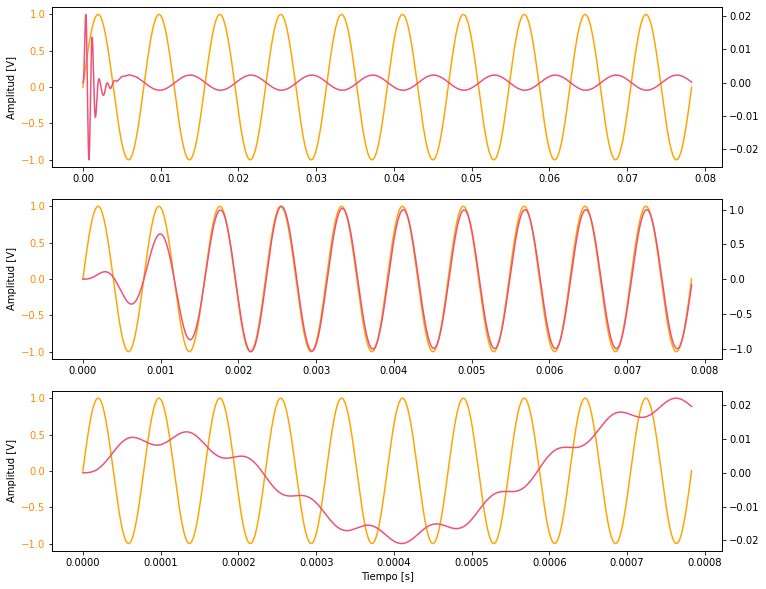

In [36]:
plt.figure(figsize=(12,10))


for i, f in enumerate((f0/dec, f0, dec*f0)):
    periodo = 1/f
    t = np.linspace(0, 10*periodo, 1000000, endpoint=False)
    sig = np.sin(2 * np.pi * f * t)
    yout, T, xout = ml.lsim(H, U = sig, T = t)
    ax1 = plt.subplot(311 + i)
    ax1.plot(t, sig, color='orange')
    ax1.set_ylabel('Amplitud [V]')
    ax1.tick_params(axis='y', labelcolor='darkorange')
    ax2 = ax1.twinx()
    ax2.plot(T, yout, color='#ed5178')
    ax2.tick_params(axis='y', labelcolor='black')
    # ax2.legend(['Teórica', 'Normalizada', 'Spice'])
ax1.set_xlabel('Tiempo [s]')
plt.show()

## Respuesta a la cuadrada

In [37]:
plt.figure(figsize=(12,10))

for i, f in enumerate((f0/dec, f0, dec*f0)):
    periodo = 1/f
    t = np.linspace(0, 10*periodo, 1000000, endpoint=False)
    sig = signal.square(2 * np.pi * f * t)/2+0.5
    yout, T, xout = ml.lsim(H, U = sig, T = t)
    # youtr, Tr, xoutr = ml.lsim(Hr, U = sig, T = t)
    ax1 = plt.subplot(311 + i)
    ax1.plot(t, sig, color='orange')
    ax1.set_ylabel('Amplitud [V]')
    ax1.tick_params(axis='y', labelcolor='darkorange')
    ax2 = ax1.twinx()
    ax2.plot(T, yout, color='#ed5178')
    #ax2.plot(Tr, youtr, color='#1655f5')
    #ax2.plot(times[i], outs[i], color='black')
    ax2.tick_params(axis='y', labelcolor='black')
    ax2.legend(['Teórica', 'Normalizada', 'Spice'])
ax1.set_xlabel('Tiempo [s]')
plt.show()

TypeError: ufunc 'remainder' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

<Figure size 864x720 with 0 Axes>